## Artificial Intelligence for Cybersecurity Project
### Dataset used: "Malicious URLs dataset" by Manu Siddhartha

### Candidates: Riccardo Fantasia & Leonardo Pantani

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df_raw = pd.read_csv("UNIPI-IA-dataset.csv")

In [3]:
df_raw.describe()

url    type
count                                              651191  651191
unique                                             641119       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                                  180  428103

In [4]:
types = ["malware", "phishing", "defacement", "benign"]

df_raw["type"] = pd.Categorical(df_raw["type"], categories=types, ordered=True)
df = df_raw.sort_values(by="type").drop_duplicates(subset="url", keep="first")

df.describe()

url    type
count                     641119  641119
unique                    641119       4
top     lynchforgov.com/contact/  benign
freq                           1  428074

In [5]:
from plotly import graph_objects as go

count = df['type'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D'
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

Estriamo le 23 features da ogni url nel dataset intero.

In [6]:
from utils.features_extractors import (extract_feature_ip_use,extract_feature_url_entropy,extract_feature_num_digits,extract_feature_url_length,extract_feature_num_query_parameters,extract_feature_num_fragments,extract_feature_num_percent20,extract_feature_num_at_signs,extract_feature_hashttp,extract_feature_hashttps,extract_feature_dot_number,extract_feature_num_www, extract_feature_directory_num,extract_feature_embed_domain_number,extract_feature_suspiciousurl,extract_feature_count_percent,extract_feature_count_dash,extract_feature_count_equal,extract_feature_is_shortened,extract_feature_hostname_length,extract_feature_first_directory_length,extract_feature_top_level_domain_length,extract_feature_letter_count)

df['feature_ip_use'] = df['url'].apply(extract_feature_ip_use)
df['feature_url_entropy'] = df['url'].apply(extract_feature_url_entropy)
df['feature_num_digits'] = df['url'].apply(extract_feature_num_digits)
df['feature_url_length'] = df['url'].apply(extract_feature_url_length)
df['feature_num_query_parameters'] = df['url'].apply(extract_feature_num_query_parameters)
df['feature_num_fragments'] = df['url'].apply(extract_feature_num_fragments)
df['feature_num_percent20'] = df['url'].apply(extract_feature_num_percent20)
df['feature_num_at_signs'] = df['url'].apply(extract_feature_num_at_signs)
df['feature_hashttp'] = df['url'].apply(extract_feature_hashttp)
df['feature_hashttps'] = df['url'].apply(extract_feature_hashttps)
df['feature_dot_number'] = df['url'].apply(extract_feature_dot_number)
df['feature_num_www'] = df['url'].apply(extract_feature_num_www)
df['feature_directory_num'] = df['url'].apply(extract_feature_directory_num)
df['feature_embed_domain_number'] = df['url'].apply(extract_feature_embed_domain_number)
df['feature_suspiciousurl'] = df['url'].apply(extract_feature_suspiciousurl)
df['feature_count_percent'] = df['url'].apply(extract_feature_count_percent)
df['feature_count_dash'] = df['url'].apply(extract_feature_count_dash)
df['feature_count_equal'] = df['url'].apply(extract_feature_count_equal)
df['feature_is_shortened'] = df['url'].apply(extract_feature_is_shortened)
df['feature_hostname_length'] = df['url'].apply(extract_feature_hostname_length)
df['feature_first_directory_length'] = df['url'].apply(extract_feature_first_directory_length)
df['feature_top_level_domain_length'] = df['url'].apply(extract_feature_top_level_domain_length)
df['feature_letter_count'] = df['url'].apply(extract_feature_letter_count)

Mostriamo una HeatMap di correlazione tra le feature

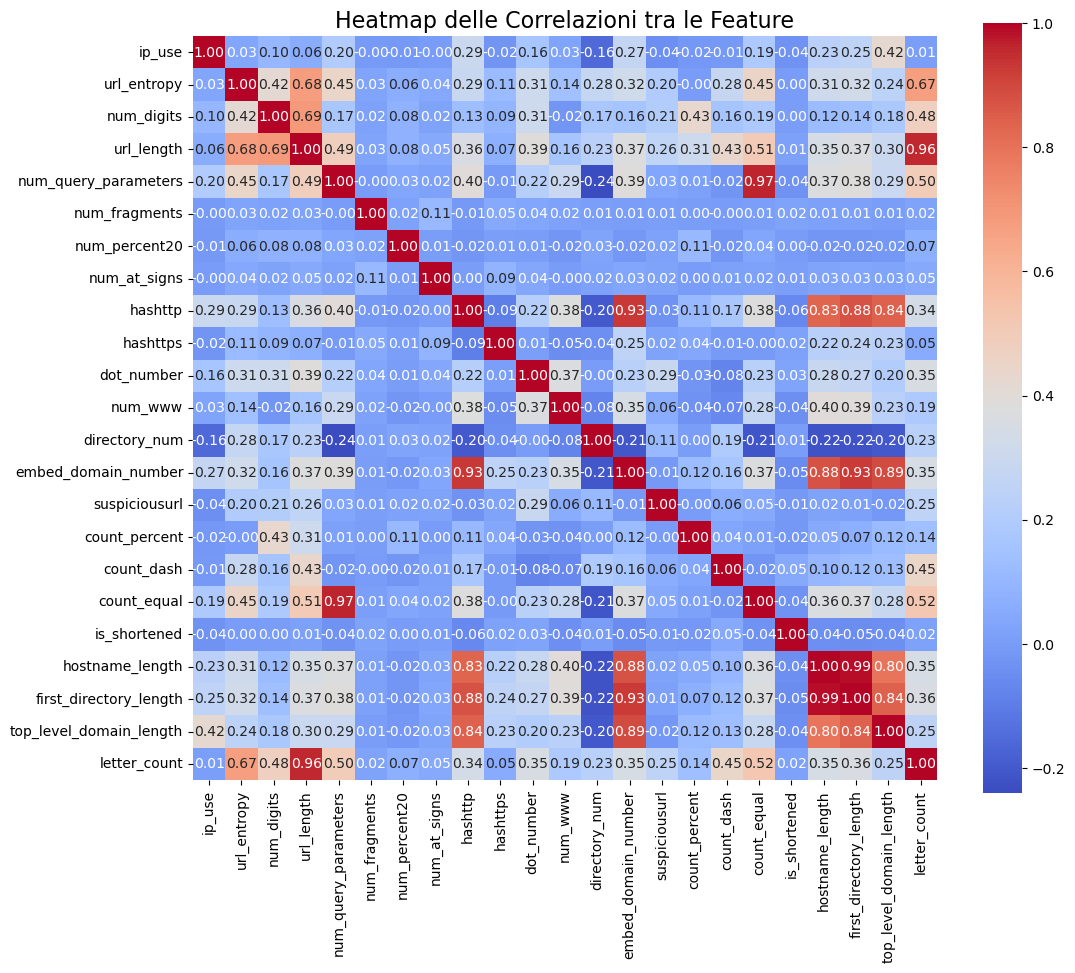

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra solo le colonne con prefisso "feature"
features_df = df[[col for col in df.columns if col.startswith('feature')]]
features_df = features_df.rename(columns=lambda x: x.replace('feature_', ''))

# Crea e mostra la heatmap
correlation_matrix = features_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap delle Correlazioni tra le Feature", fontsize=16)
plt.show()

Data la forte correlazione tra:
- embed_domain_number <-> hashttp
- count_equal <-> num_query_parameters
- url_length <-> letter_count

... e data la stretta somiglianza logica delle funzioni abbiamo deciso di rimuovere:
- embed_domain_number
- count_equal
- url_length

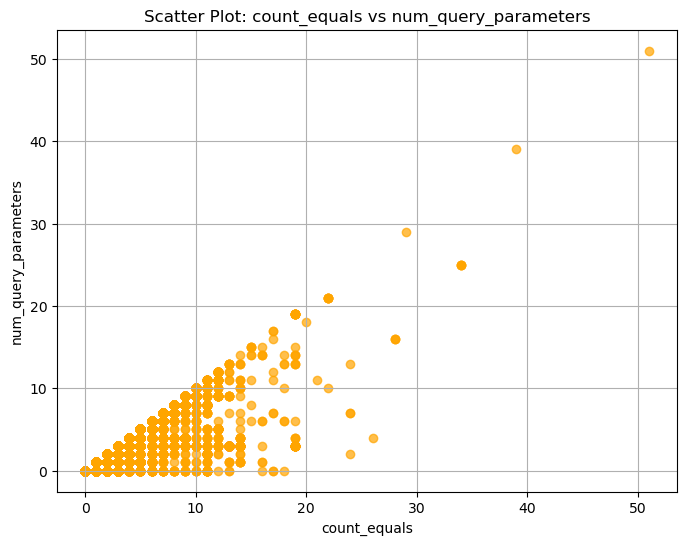

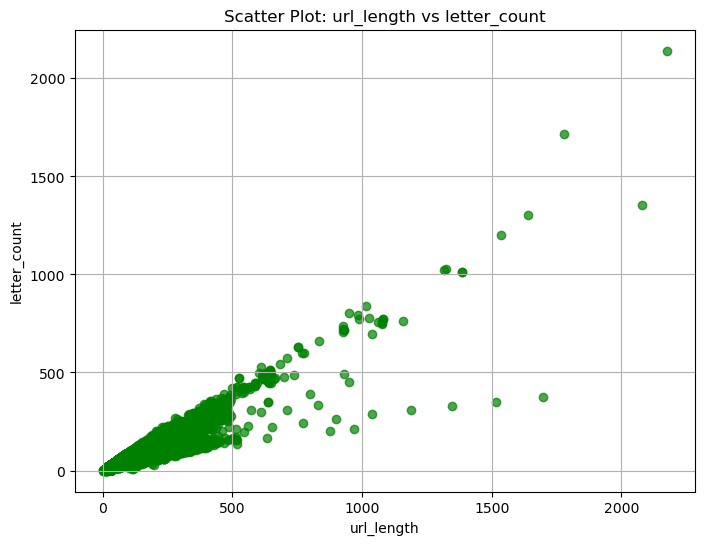

In [8]:
# Scatter plot di count_equal <-> num_query_parameters
plt.figure(figsize=(8, 6))
plt.scatter(features_df['count_equal'], features_df['num_query_parameters'], alpha=0.7, color='orange')
plt.title('Scatter Plot: count_equals vs num_query_parameters')
plt.xlabel('count_equals')
plt.ylabel('num_query_parameters')
plt.grid(True)
plt.show()

# Scatter plot di url_length <-> letter_count
plt.figure(figsize=(8, 6))
plt.scatter(features_df['url_length'], features_df['letter_count'], alpha=0.7, color='green')
plt.title('Scatter Plot: url_length vs letter_count')
plt.xlabel('url_length')
plt.ylabel('letter_count')
plt.grid(True)
plt.show()

Facciamo un box plot per ogni feature

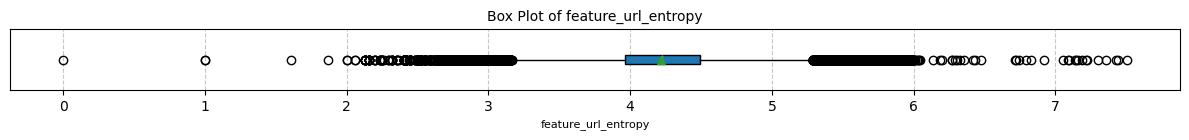

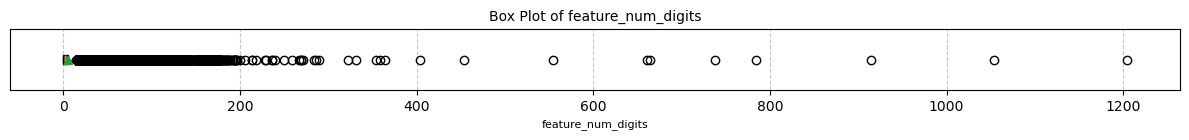

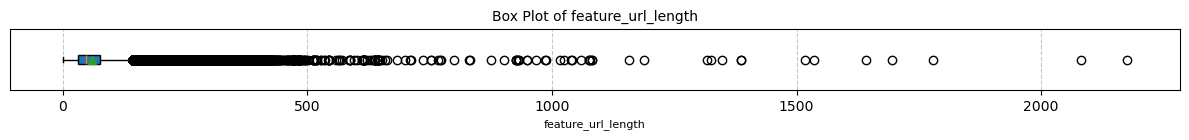

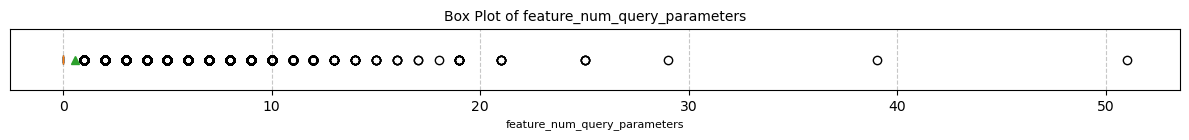

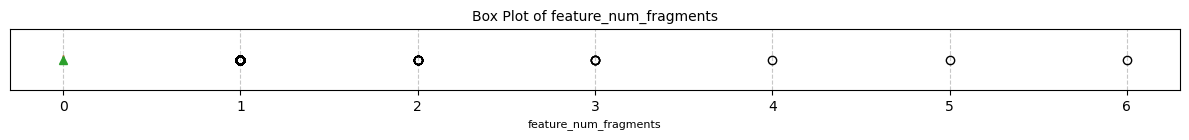

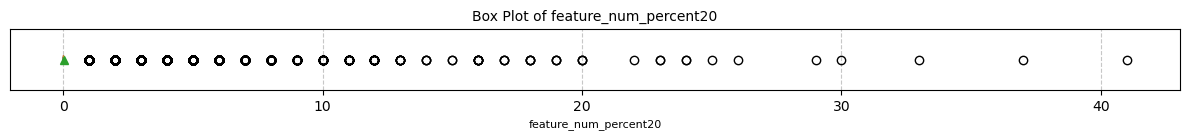

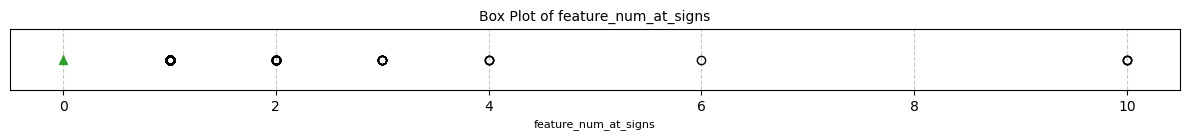

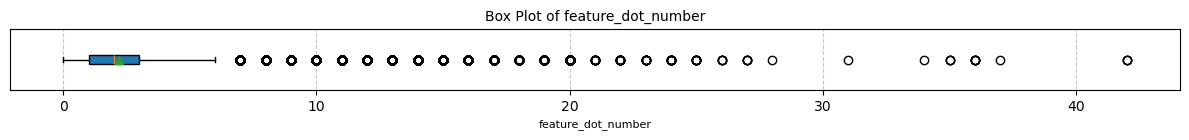

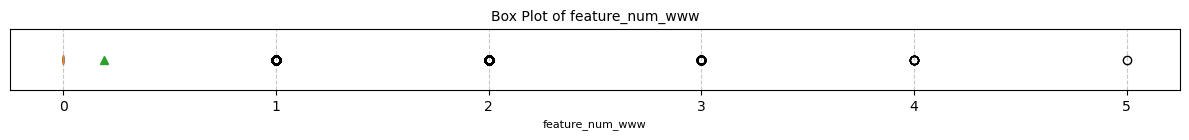

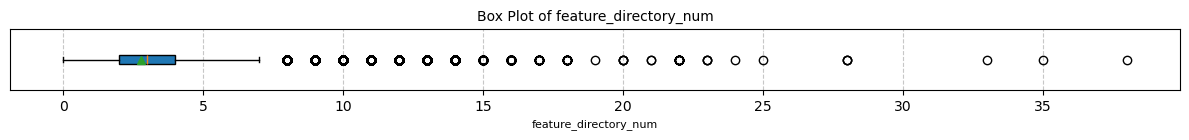

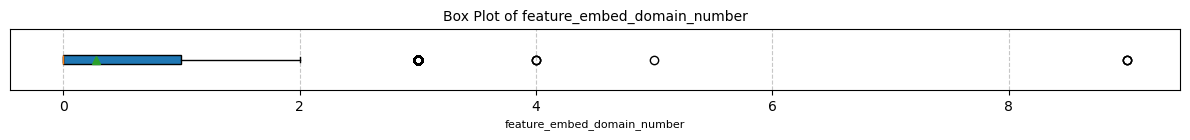

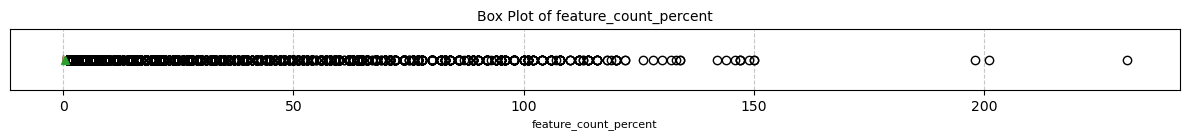

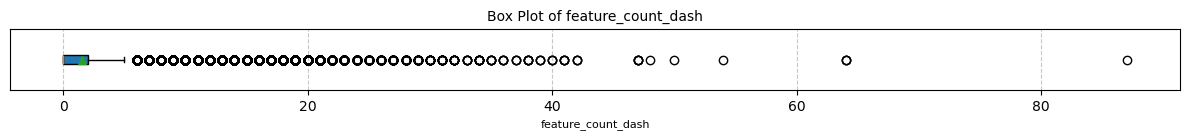

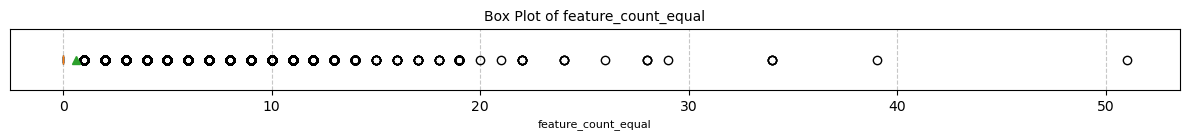

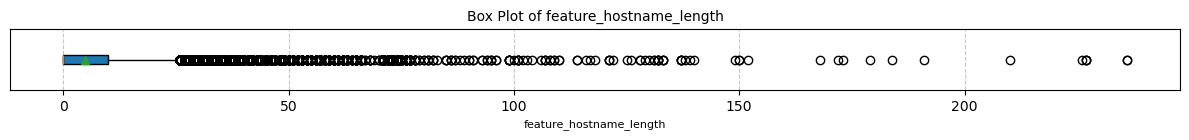

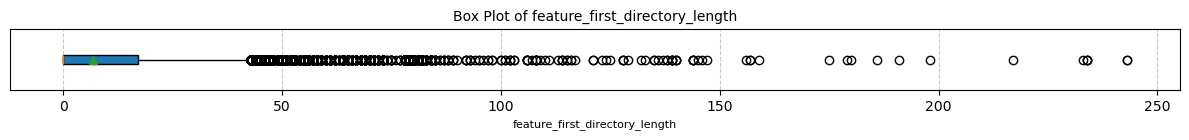

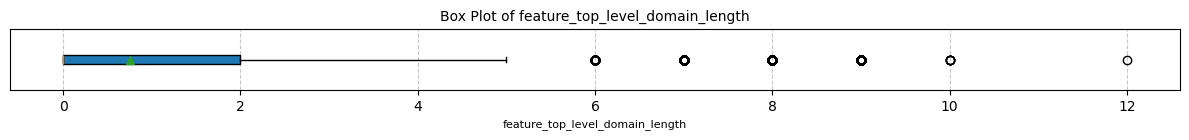

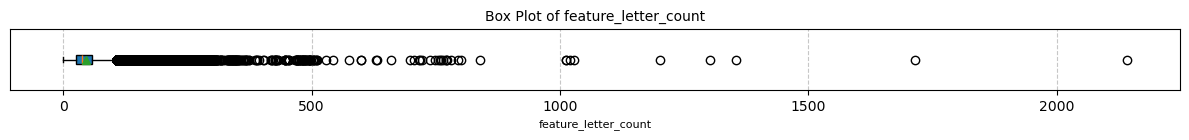

In [9]:
features = ['feature_url_entropy', 'feature_num_digits', 'feature_url_length', 'feature_num_query_parameters', 'feature_num_fragments', 'feature_num_percent20', 'feature_num_at_signs', 'feature_dot_number', 'feature_num_www', 'feature_directory_num', 'feature_embed_domain_number', 'feature_count_percent', 'feature_count_dash', 'feature_count_equal', 'feature_hostname_length', 'feature_first_directory_length', 'feature_top_level_domain_length', 'feature_letter_count']
for feature in features:
    plt.figure(figsize=(12, 1.5))
    plt.boxplot(df[feature].dropna(), vert=False, patch_artist=True, showmeans=True)
    plt.title(f'Box Plot of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.gca().yaxis.set_visible(False)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Rimuoviamo le seguenti feature:
- embed_domain_number
- count_equal
- url_length

Testeremo successivamente allenando il modello di classificazione sul dataset originale e su quello ripulito dalle suddette feature, per valutare l'effettivo miglioramento in termini di classificazione.

In [10]:
df = df.drop(columns=["feature_embed_domain_number", "feature_count_equal", "feature_url_length"])

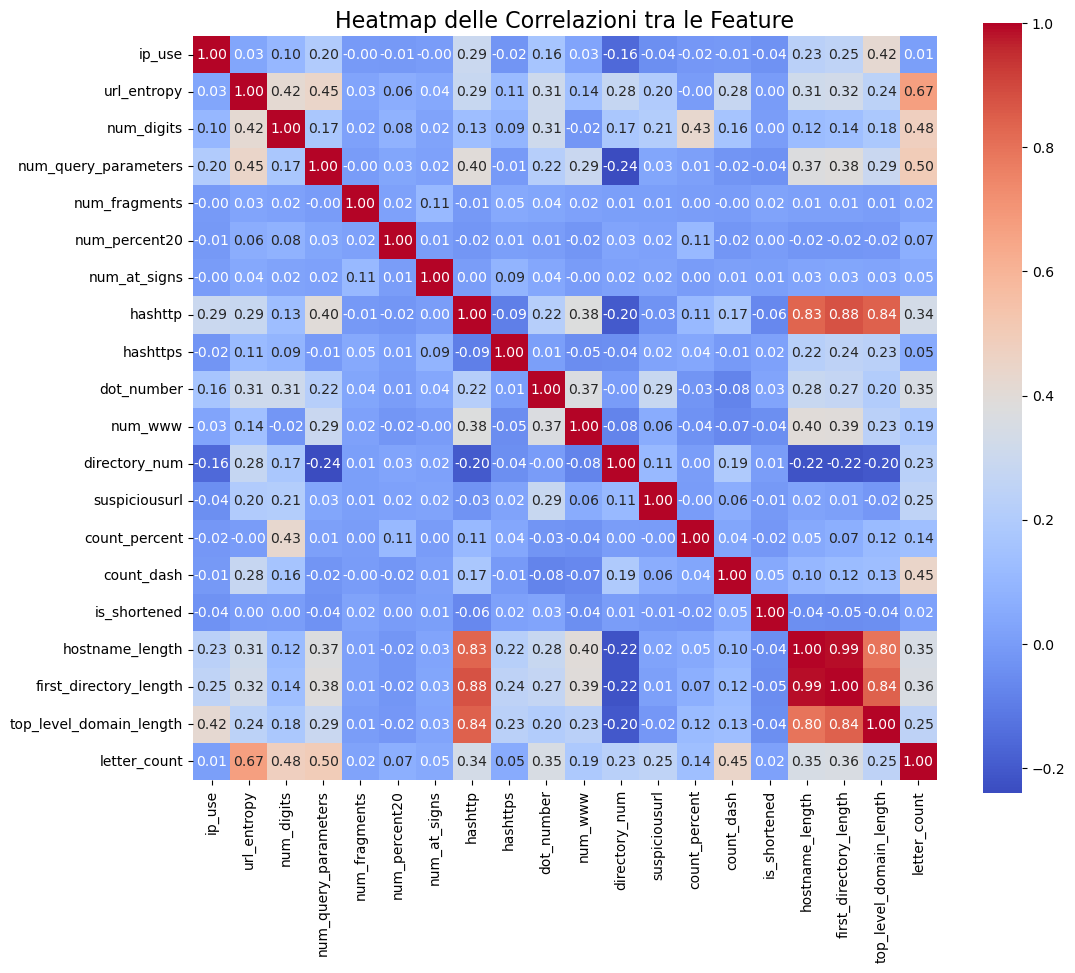

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra solo le colonne con prefisso "feature"
features_df = df[[col for col in df.columns if col.startswith('feature')]]
features_df = features_df.rename(columns=lambda x: x.replace('feature_', ''))

# Crea e mostra la heatmap
correlation_matrix = features_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap delle Correlazioni tra le Feature", fontsize=16)
plt.show()

Creiamo ora per i nostri scopi successivi una funzione per ripulire il dataset da alcuni outlier. Decidiamo di impostare un treshold abbastanza conservativo (3xIQR) data la natura dei numerevoli outlier, che non derivano da errori di misura, ma rappresentano possibili URL malevoli o casi limite. Rimuoverli in modo troppo aggressivo (1.5xIQR) rischierebbe di perdere esempi rilevanti per il modello. La soglia più ampia massimizza la conservazione di dati potenzialmente informativi pur riducendo valori estremi eccessivi.

In [12]:
def remove_outliers(df):
    df_clean = df.copy()
    columns=['feature_url_entropy', 'feature_num_digits', 'feature_dot_number', 'feature_directory_num', 'feature_hostname_length', 'feature_first_directory_length', 'feature_top_level_domain_length', 'feature_letter_count']
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df_clean = df_clean[
            (df_clean[column] >= lower_bound) & 
            (df_clean[column] <= upper_bound)
        ]
    return df_clean

Suddividiamo il dataset in training e test set con un rapporto 80% e 20%, sia per il caso senza outlier che con.

Esempi di training [tot: 512895]:
 Classe phishing: 75274 (14.68% del totale)
 Classe benign: 342459 (66.77% del totale)
 Classe malware: 18916 (3.69% del totale)
 Classe defacement: 76246 (14.87% del totale)
Esempi di test [tot: 128224]:
 Classe benign: 85615 (66.77% del totale)
 Classe defacement: 19062 (14.87% del totale)
 Classe phishing: 18818 (14.68% del totale)
 Classe malware: 4729 (3.69% del totale)

Shape of x_train_unbalanced before removing outliers: (512895, 20)

Shape of x_train_clean_unbalanced after removing outliers: (382299, 20)


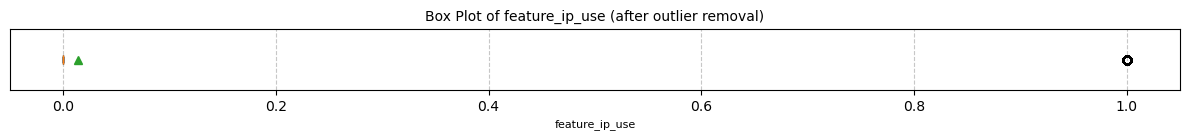

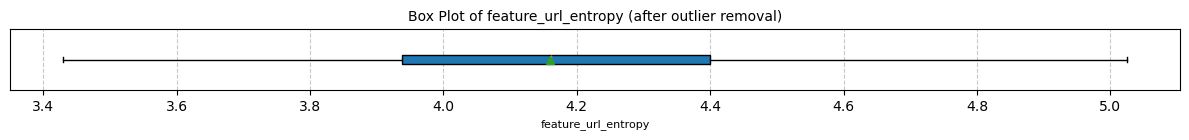

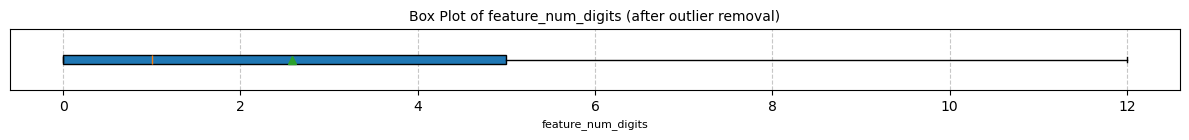

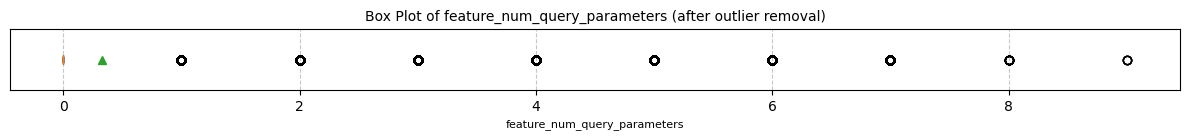

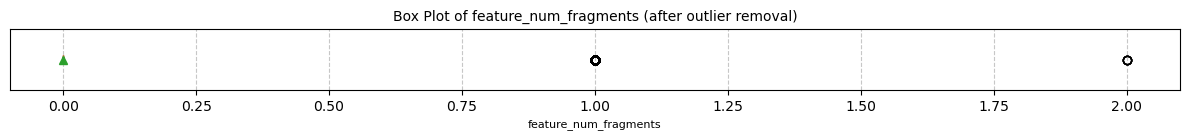

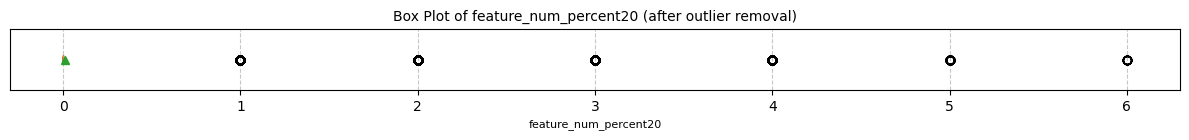

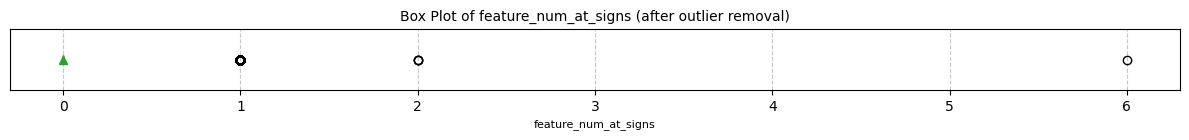

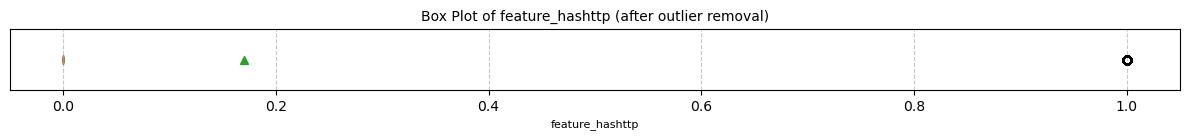

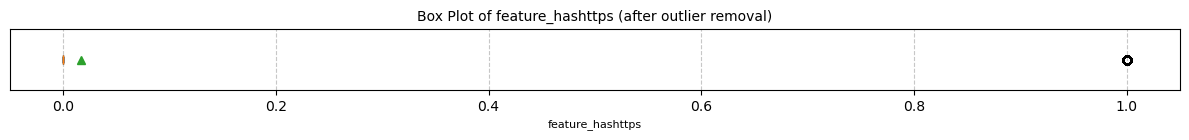

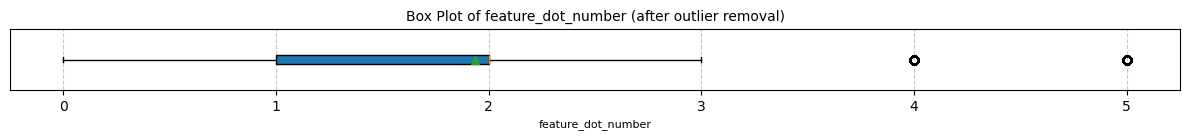

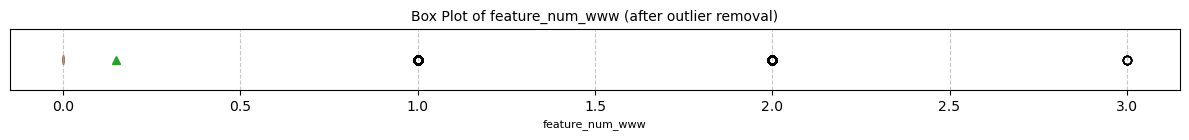

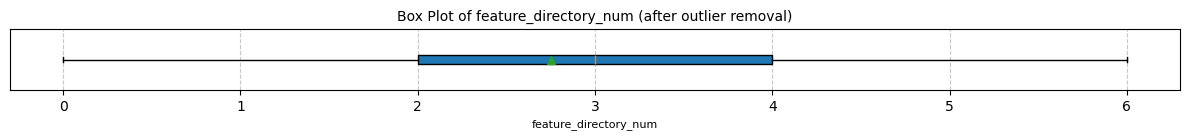

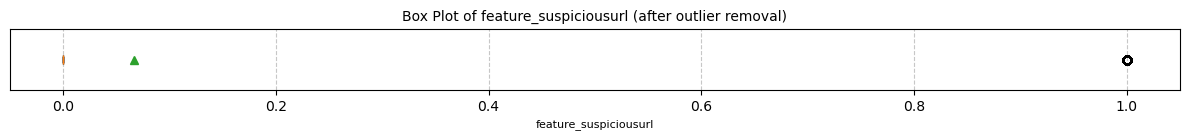

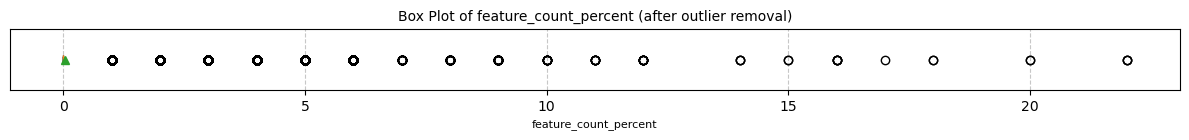

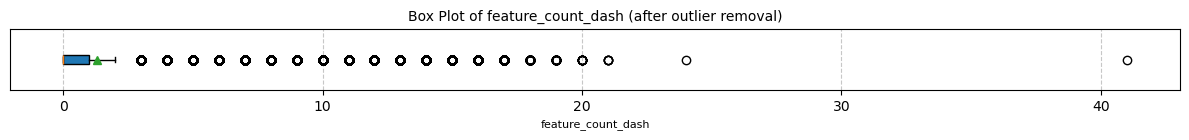

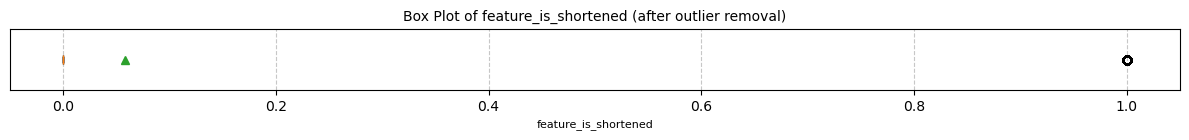

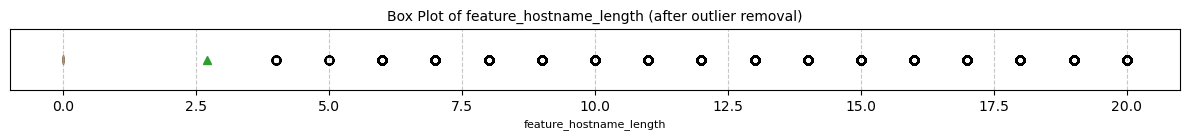

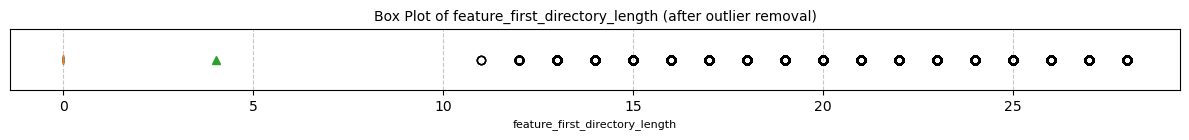

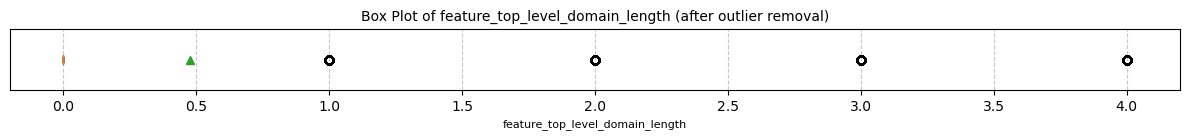

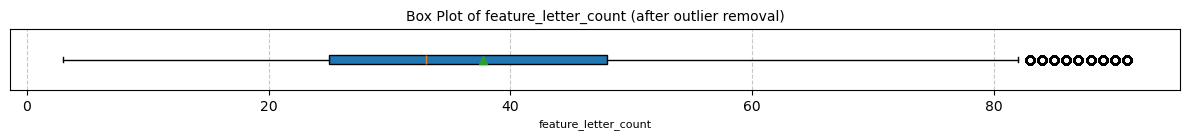

In [13]:
from sklearn.model_selection import train_test_split
from utils.utils import printInfo

train_ratio = 0.80
test_ratio = 0.20
x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(df.drop(columns=["type", "url"]).copy(), df["type"].copy(), test_size=1-train_ratio, shuffle=True, stratify=df["type"].copy())

printInfo("training", y_train_unbalanced)
printInfo("test", y_test)

#rimozione degli outliers
x_train_clean_unbalanced = remove_outliers(x_train_unbalanced)
y_train_clean_unbalanced = y_train_unbalanced[x_train_clean_unbalanced.index]

print("\nShape of x_train_unbalanced before removing outliers:", x_train_unbalanced.shape)
print("\nShape of x_train_clean_unbalanced after removing outliers:", x_train_clean_unbalanced.shape)

# Crea boxplot per ogni feature del dataset pulito
features = x_train_clean_unbalanced.columns

for feature in features:
    plt.figure(figsize=(12, 1.5))
    plt.boxplot(x_train_clean_unbalanced[feature].dropna(), 
                vert=False, 
                patch_artist=True, 
                showmeans=True)
    plt.title(f'Box Plot of {feature} (after outlier removal)', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.gca().yaxis.set_visible(False)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



Un aspetto che notiamo dall'output soprastante è lo sbilanciamento, in termini di numero di sample, della classe malevola rispetto alla benigna.

In [14]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

def balance_data_undersample_benign(x_train, y_train):
    class_counts = Counter(y_train)
    other_classes_count = sum([class_counts[label] for label in class_counts if label != "benign"])
    benign_target = other_classes_count
    undersampling_strategy = {"benign": benign_target}
    rus = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)
    x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
    return x_train_resampled, y_train_resampled

x_train, y_train = balance_data_undersample_benign(x_train_unbalanced, y_train_unbalanced)
x_train_clean, y_train_clean = balance_data_undersample_benign(x_train_clean_unbalanced, y_train_clean_unbalanced) #senza outliers
printInfo("training bilanciato", y_train)

Esempi di training bilanciato [tot: 340872]:
 Classe benign: 170436 (50.00% del totale)
 Classe defacement: 76246 (22.37% del totale)
 Classe malware: 18916 (5.55% del totale)
 Classe phishing: 75274 (22.08% del totale)


Nell'ottica di una classificazione eseguita mantenendo gli outliers, si procede inizialmente con una normalizzazione RobustScaler che mantiene meglio l'effetto degli outliers. Dopodiché si procederà con una Z-Normalization.

Statistiche descrittive con outliers:
       feature_ip_use  feature_url_entropy  feature_num_digits  \
count   340872.000000         3.408720e+05       340872.000000   
mean         0.045384        -1.258850e-02            0.541878   
std          0.208144         7.771508e-01            1.885489   
min          0.000000        -7.760820e+00           -0.333333   
25%          0.000000        -4.902650e-01           -0.333333   
50%          0.000000        -8.150756e-16            0.000000   
75%          0.000000         5.097350e-01            0.666667   
max          1.000000         6.012131e+00          200.333333   

       feature_num_query_parameters  feature_num_fragments  \
count                 340872.000000          340872.000000   
mean                       0.677782               0.001127   
std                        1.551955               0.036638   
min                        0.000000               0.000000   
25%                        0.000000               0.00000

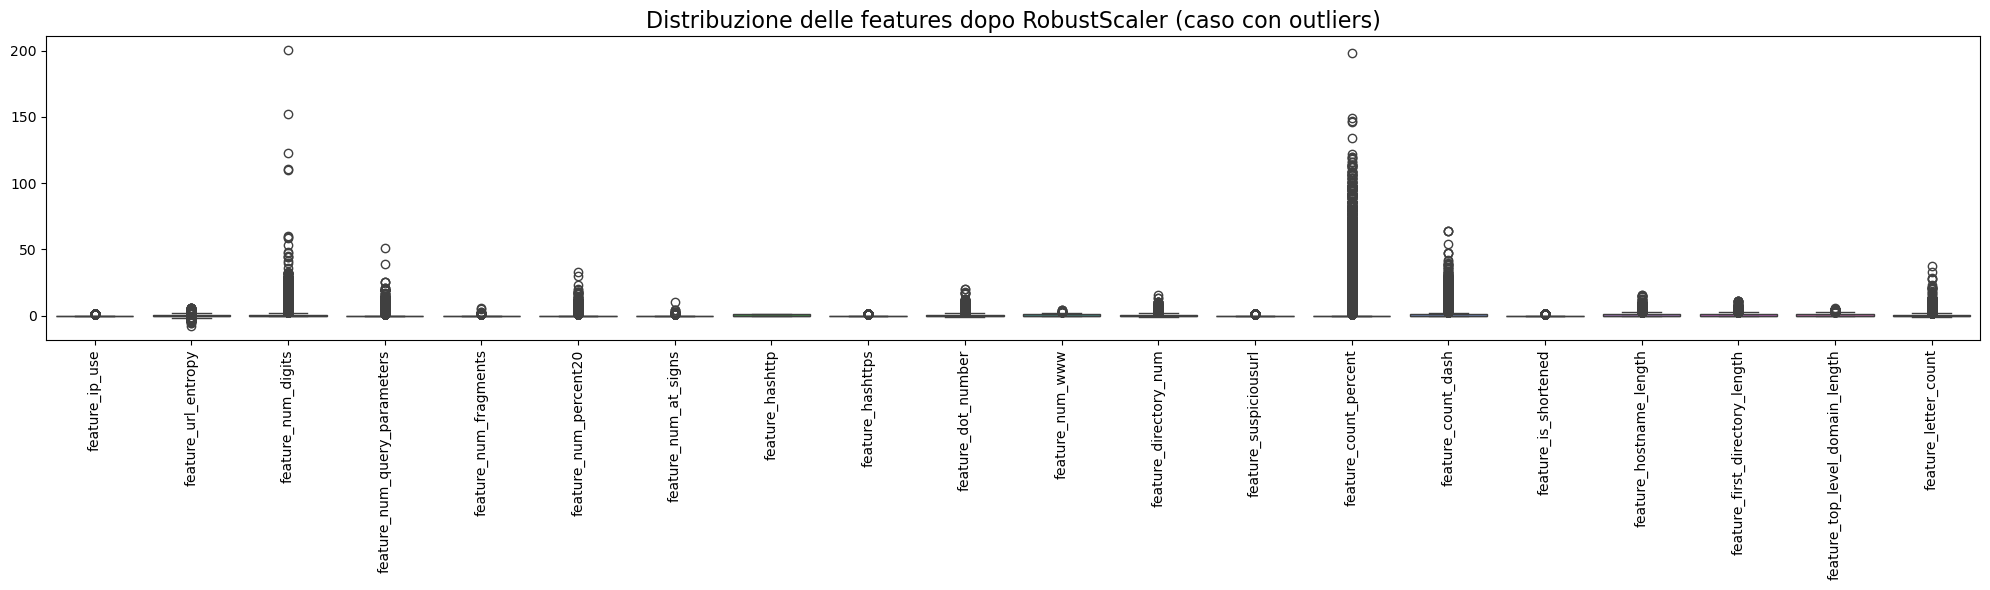

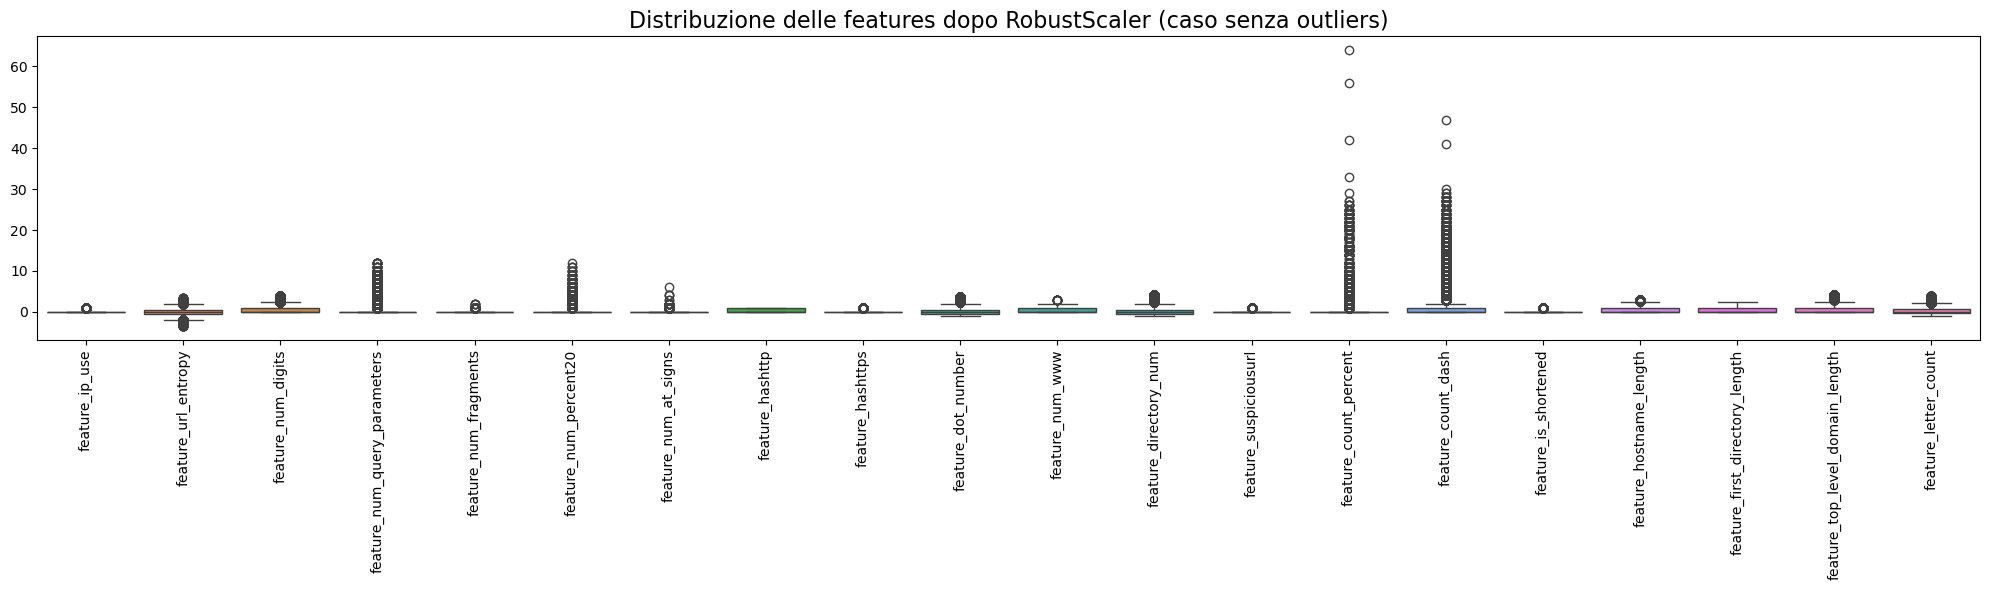

In [19]:
from sklearn.preprocessing import RobustScaler

scaler_with_outliers = RobustScaler()
scaler_clean = RobustScaler()

#dati con outliers
x_train_scaled_robust = scaler_with_outliers.fit_transform(x_train)
x_test_scaled_robust = scaler_with_outliers.transform(x_test)

#dati senza outliers
x_train_clean_scaled_robust = scaler_clean.fit_transform(x_train_clean)



x_train_scaled_robust = pd.DataFrame(x_train_scaled_robust, columns=x_train.columns, index=x_train.index)

x_test_scaled_robust = pd.DataFrame(x_test_scaled_robust,columns=x_test.columns,index=x_test.index)

x_train_clean_scaled_robust = pd.DataFrame(x_train_clean_scaled_robust,columns=x_train_clean.columns,index=x_train_clean.index)


print("Statistiche descrittive con outliers:")
print(x_train_scaled_robust.describe())
print("\n ----------------------------------------------------------")

print("Statistiche descrittive senza outliers:")
print(x_train_clean_scaled_robust.describe())

# Visualizzazione con boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(data=x_train_scaled_robust)
plt.title('Distribuzione delle features dopo RobustScaler (caso con outliers)', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=x_train_clean_scaled_robust)
plt.title('Distribuzione delle features dopo RobustScaler (caso senza outliers)', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Ora Z-Normalization

Statistiche con outliers:
       feature_ip_use  feature_url_entropy  feature_num_digits  \
count    3.408720e+05         3.408720e+05        3.408720e+05   
mean    -6.136725e-17        -1.398106e-15        2.668141e-17   
std      1.000001e+00         1.000001e+00        1.000001e+00   
min     -2.191298e-01        -7.591385e+00       -4.852607e-01   
25%     -2.191298e-01        -6.146705e-01       -4.852607e-01   
50%     -2.191298e-01         1.756557e-02       -3.000590e-01   
75%     -2.191298e-01         6.716030e-01        7.034439e-02   
max      4.563506e+00         7.587838e+00        3.692548e+01   

       feature_num_query_parameters  feature_num_fragments  \
count                  3.408720e+05           3.408720e+05   
mean                   4.602544e-17           9.338495e-18   
std                    1.000001e+00           1.000001e+00   
min                   -4.368094e-01          -3.164161e-02   
25%                   -4.368094e-01          -3.164161e-02   
50%    

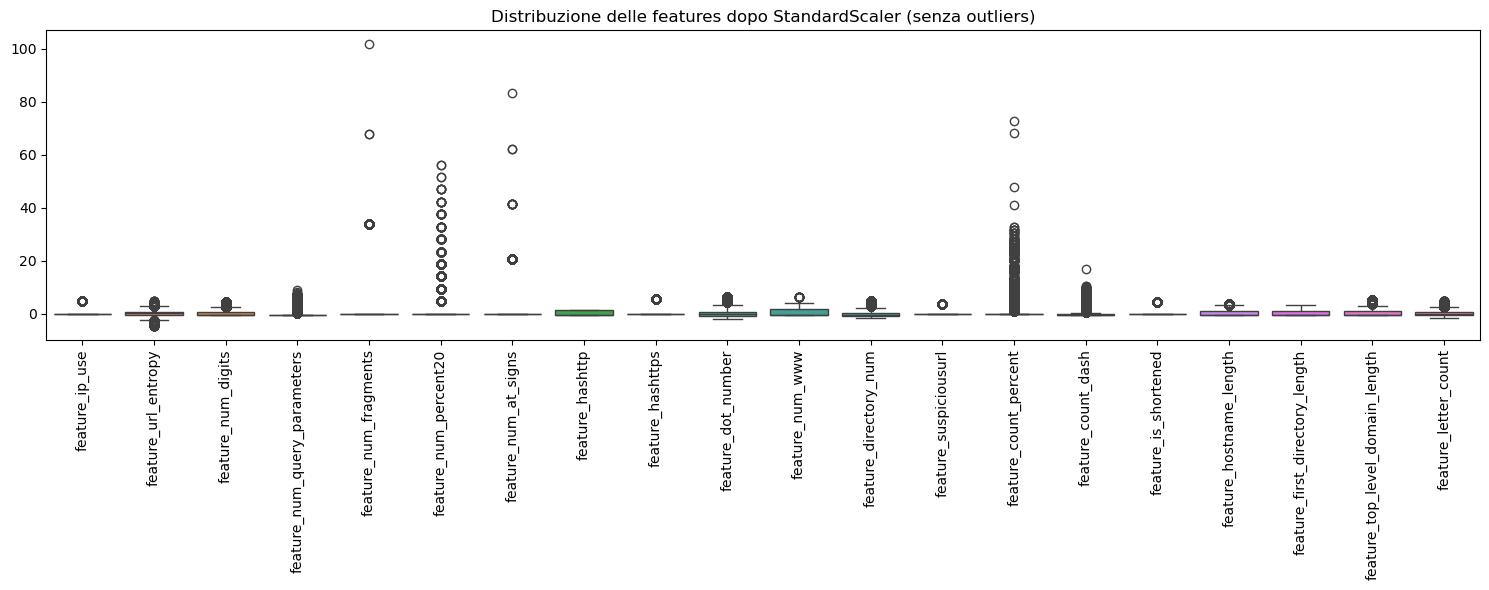

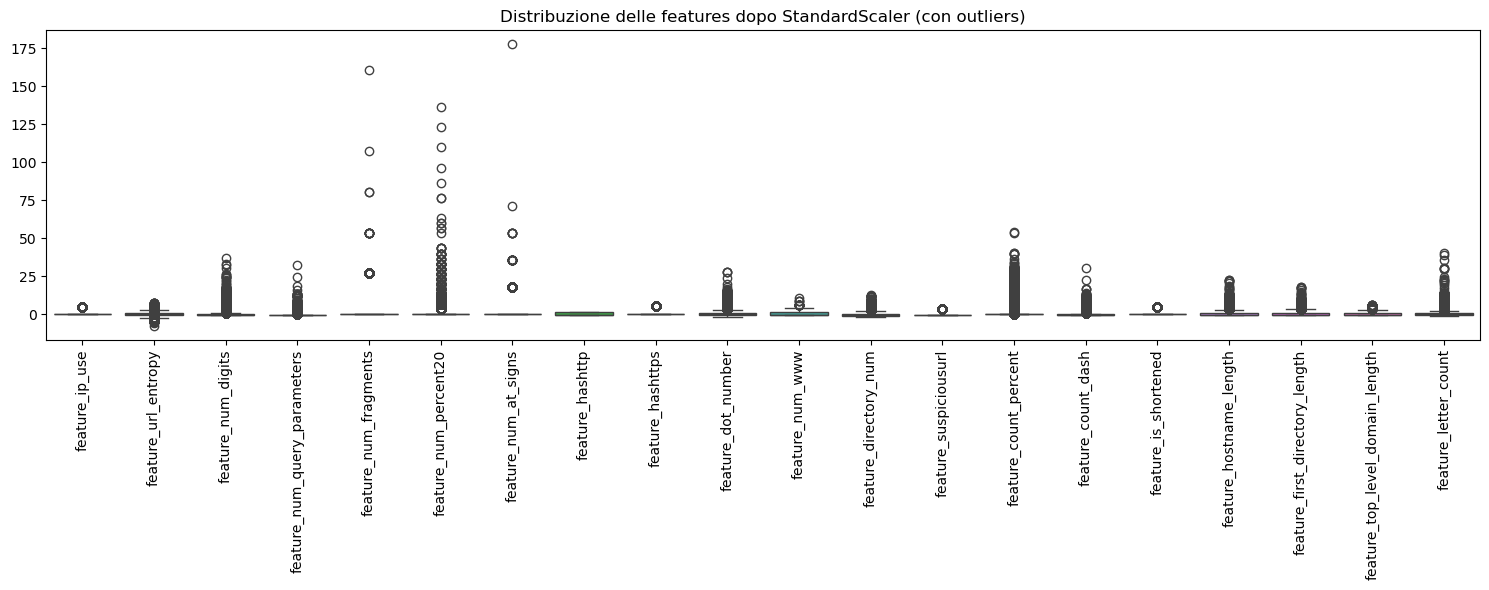

In [16]:
from sklearn.preprocessing import StandardScaler

# 1. Definire due scaler diversi
scaler_with_outliers = StandardScaler()
scaler_clean = StandardScaler()

# 2. Scalare i dati con outliers
x_train_scaled_standard = scaler_with_outliers.fit_transform(x_train)


# 3. Scalare i dati senza outliers
x_train_clean_scaled_standard = scaler_clean.fit_transform(x_train_clean)

x_test_scaled_standard = scaler_clean.transform(x_test)

# 4. Convertire tutto in DataFrame mantenendo colonne e indici
x_train_scaled_standard = pd.DataFrame(
    x_train_scaled_standard, 
    columns=x_train.columns, 
    index=x_train.index
)


x_train_clean_scaled_standard = pd.DataFrame(
    x_train_clean_scaled_standard,
    columns=x_train_clean.columns,
    index=x_train_clean.index
)

x_test_scaled_standard = pd.DataFrame(
    x_test_scaled_standard,
    columns=x_test.columns,
    index=x_test.index
)

# Statistiche descrittive e visualizzazione
print("Statistiche con outliers:")
print(x_train_scaled_standard.describe())
print("\nStatistiche senza outliers:")
print(x_train_clean_scaled_standard.describe())

# Boxplot per confronto
plt.figure(figsize=(15, 6))
sns.boxplot(data=x_train_clean_scaled_standard)
plt.title('Distribuzione delle features dopo StandardScaler (senza outliers)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=x_train_scaled_standard)
plt.title('Distribuzione delle features dopo StandardScaler (con outliers)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# CLASSIFICATORI

## Random Forest

Caso con outliers

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier_randomforest = RandomForestClassifier()
classifier_randomforest.fit(x_train, y_train)

RandomForestClassifier()

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.9341 ± 0.0005
Mean F1 Score: 0.9335 ± 0.0005
Mean AUC Score: 0.9838 ± 0.0003

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.96      0.96     85615
    phishing       0.97      0.99      0.98     19062
  defacement       0.97      0.91      0.94      4729
     malware       0.80      0.83      0.81     18818

    accuracy                           0.94    128224
   macro avg       0.93      0.92      0.92    128224
weighted avg       0.94      0.94      0.94    128224


AUC Score: 0.9839


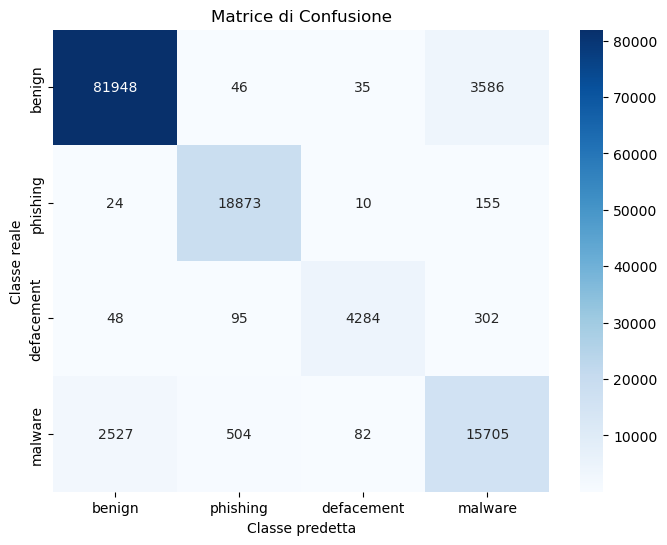

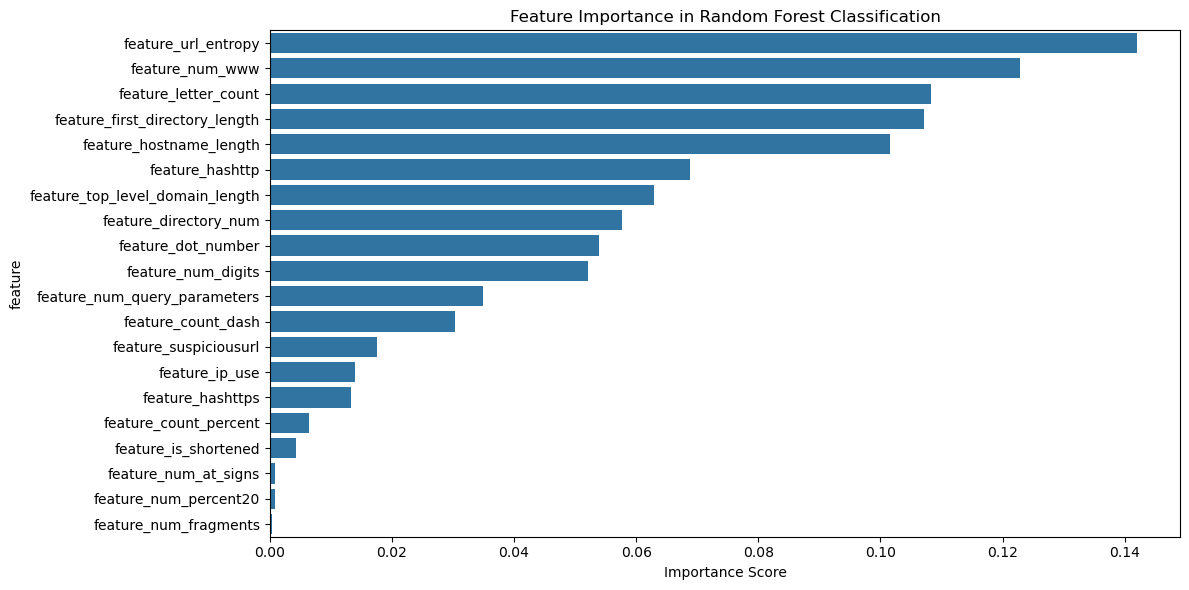

In [16]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stratified K-Fold Cross Validation
k = 5  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Store cross-validation results
cv_accuracy = []
cv_f1 = []
cv_auc = []

for train_index, val_index in stratified_kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    classifier_randomforest.fit(x_train_fold, y_train_fold)

    # Predictions
    y_val_pred = classifier_randomforest.predict(x_val_fold)
    y_val_proba = classifier_randomforest.predict_proba(x_val_fold)

    # Metrics
    cv_accuracy.append(accuracy_score(y_val_fold, y_val_pred))
    cv_f1.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    cv_auc.append(roc_auc_score(y_val_fold, y_val_proba, multi_class='ovr'))

# Average CV metrics
print("Stratified K-Fold Cross Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_accuracy):.4f} \u00b1 {np.std(cv_accuracy):.4f}")
print(f"Mean F1 Score: {np.mean(cv_f1):.4f} \u00b1 {np.std(cv_f1):.4f}")
print(f"Mean AUC Score: {np.mean(cv_auc):.4f} \u00b1 {np.std(cv_auc):.4f}")

# Original performance metrics
y_pred = classifier_randomforest.predict(x_test)
y_pred_proba = classifier_randomforest.predict_proba(x_test)

report = classification_report(y_test, y_pred, target_names=['benign', 'phishing', 'defacement', 'malware'])
print("\nClassification Report:")
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"\nAUC Score: {auc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'phishing', 'defacement', 'malware'],
            yticklabels=['benign', 'phishing', 'defacement', 'malware'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': classifier_randomforest.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Classification')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


Caso senza outliers, vediamo se ne ha beneficiato oppure no

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier_randomforest_without_outliers = RandomForestClassifier()
classifier_randomforest_without_outliers.fit(x_train_clean, y_train_clean)

RandomForestClassifier()

Stratified K-Fold Cross Validation Results:
Mean Accuracy: 0.9340 ± 0.0004
Mean F1 Score: 0.9335 ± 0.0004
Mean AUC Score: 0.9838 ± 0.0004

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.96      0.96     85615
    phishing       0.97      0.99      0.98     19062
  defacement       0.97      0.90      0.94      4729
     malware       0.80      0.84      0.81     18818

    accuracy                           0.94    128224
   macro avg       0.93      0.92      0.92    128224
weighted avg       0.94      0.94      0.94    128224


AUC Score: 0.9842


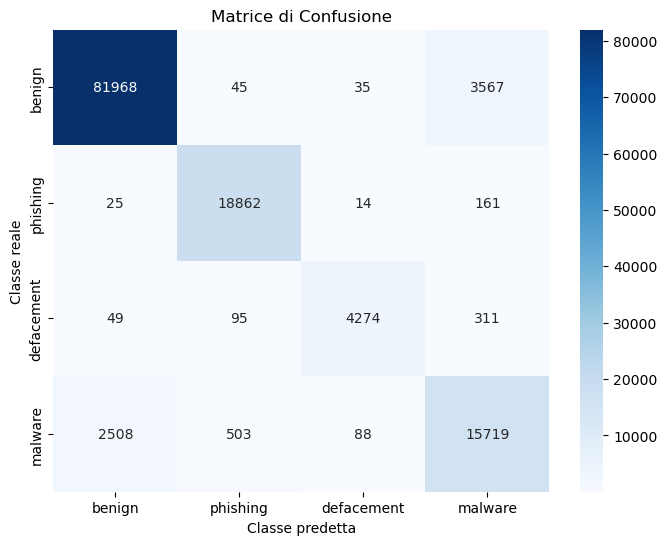

In [18]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stratified K-Fold Cross Validation
k = 5  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Store cross-validation results
cv_accuracy = []
cv_f1 = []
cv_auc = []

for train_index, val_index in stratified_kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    classifier_randomforest_without_outliers.fit(x_train_fold, y_train_fold)

    # Predictions
    y_val_pred = classifier_randomforest_without_outliers.predict(x_val_fold)
    y_val_proba = classifier_randomforest_without_outliers.predict_proba(x_val_fold)

    # Metrics
    cv_accuracy.append(accuracy_score(y_val_fold, y_val_pred))
    cv_f1.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    cv_auc.append(roc_auc_score(y_val_fold, y_val_proba, multi_class='ovr'))

# Average CV metrics
print("Stratified K-Fold Cross Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_accuracy):.4f} \u00b1 {np.std(cv_accuracy):.4f}")
print(f"Mean F1 Score: {np.mean(cv_f1):.4f} \u00b1 {np.std(cv_f1):.4f}")
print(f"Mean AUC Score: {np.mean(cv_auc):.4f} \u00b1 {np.std(cv_auc):.4f}")

# Original performance metrics
y_pred = classifier_randomforest_without_outliers.predict(x_test)
y_pred_proba = classifier_randomforest_without_outliers.predict_proba(x_test)

report = classification_report(y_test, y_pred, target_names=['benign', 'phishing', 'defacement', 'malware'])
print("\nClassification Report:")
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"\nAUC Score: {auc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'phishing', 'defacement', 'malware'],
            yticklabels=['benign', 'phishing', 'defacement', 'malware'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione')
plt.show()


Proviamo anche l'effetto dello strong scaler

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier_randomforest_without_outliers = RandomForestClassifier()
classifier_randomforest_without_outliers.fit(x_train_scaled_robust, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

      benign       0.85      0.91      0.88     85615
    phishing       0.00      0.00      0.00     19062
  defacement       0.36      0.01      0.02      4729
     malware       0.14      0.27      0.18     18818

    accuracy                           0.65    128224
   macro avg       0.34      0.30      0.27    128224
weighted avg       0.60      0.65      0.61    128224

AUC Score: 0.7636


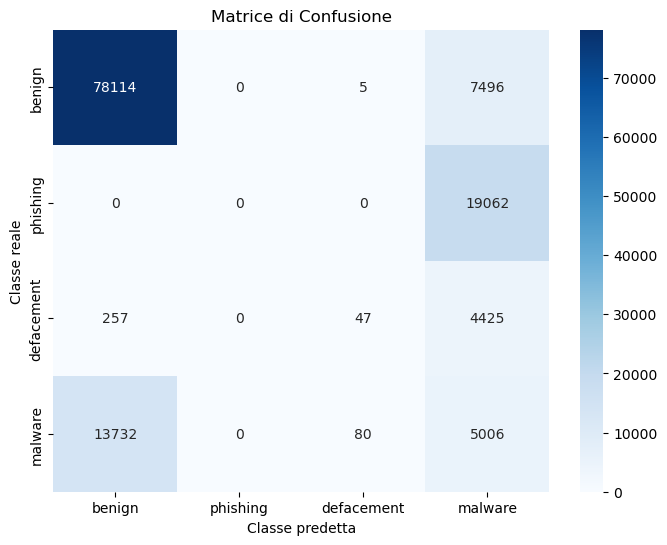

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

y_pred = classifier_randomforest_without_outliers.predict(x_test)
y_pred_proba = classifier_randomforest_without_outliers.predict_proba(x_test)

report = classification_report(y_test, y_pred, target_names=['benign', 'phishing', 'defacement', 'malware'])
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'phishing', 'defacement', 'malware'], yticklabels=['benign', 'phishing', 'defacement', 'malware'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione')
plt.show()

Le prestazioni inferiori del modello Random Forest applicato ai dati normalizzati con lo StrongScaler, rispetto a quelli trattati con la tua funzione di rimozione degli outliers, possono essere attribuite alla natura dei modelli basati su alberi. Il Random Forest non è sensibile alla scala delle feature, poiché le sue suddivisioni si basano direttamente sui valori grezzi delle variabili. L'uso di un metodo come lo StrongScaler, che riduce l'impatto degli outliers comprimendoli nell'intervallo interquartile, può attenuare segnali informativi cruciali presenti in questi valori estremi. D'altra parte, la funzione di rimozione degli outliers elimina completamente tali dati, portando a una perdita di informazioni rilevanti. Nel contesto del dataset in esame, in cui gli outliers rappresentano URL malevoli, mantenere tali punti dati è essenziale, poiché forniscono un contributo discriminativo significativo al modello. Questo spiega perché il Random Forest applicato ai dati grezzi, che preservano integralmente gli outliers, ottiene le migliori prestazioni, evidenziando l'importanza di trattare con attenzione i valori estremi nei dataset in cui non sono errori di misurazione, ma piuttosto dati rilevanti per il problema in analisi.

## LOGISTIC REGRESSION
Data la natura di questo classificatore, è necessario categorizzare le classi phishing, defacement, malware in un'unica che considereremo come "maligna".

In [23]:
# Raggruppa le classi in 'malignant' e 'benign'
y_train = y_train.replace({"malware": "malignant", "phishing": "malignant", "defacement": "malignant", "benign": "benign"})
y_train_clean = y_train_clean.replace({"malware": "malignant", "phishing": "malignant", "defacement": "malignant", "benign": "benign"})
y_test = y_test.replace({"malware": "malignant", "phishing": "malignant", "defacement": "malignant", "benign": "benign"})

printInfo("training", y_train)
printInfo("test", y_test)

Esempi di training [tot: 340872]:
 Classe benign: 170436 (50.00% del totale)
 Classe malignant: 170436 (50.00% del totale)
Esempi di test [tot: 128224]:
 Classe malignant: 42609 (33.23% del totale)
 Classe benign: 85615 (66.77% del totale)


### Con Robust Scaler (caso con outliers)

In [24]:
from sklearn.linear_model import LogisticRegression

classifier_logisticregression = LogisticRegression()
classifier_logisticregression.fit(x_train_scaled_robust, y_train)

LogisticRegression()

              precision    recall  f1-score   support

      benign       0.92      0.91      0.92     85615
   malignant       0.83      0.83      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224

AUC Score: 0.9465


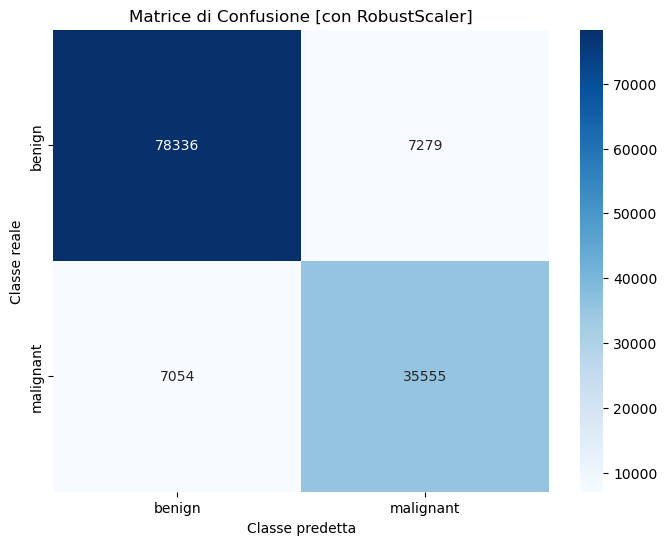

In [25]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

y_pred = classifier_logisticregression.predict(x_test_scaled_robust)
y_pred_proba = classifier_logisticregression.predict_proba(x_test_scaled_robust)

report = classification_report(y_test, y_pred, target_names=['benign', 'malignant'])
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione [con RobustScaler]')
plt.show()

Caso senza outliers

In [26]:
from sklearn.linear_model import LogisticRegression

classifier_logisticregression = LogisticRegression()
classifier_logisticregression.fit(x_train_clean_scaled_robust, y_train_clean)

LogisticRegression()

              precision    recall  f1-score   support

      benign       0.92      0.92      0.92     85615
   malignant       0.83      0.83      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224

AUC Score: 0.9447


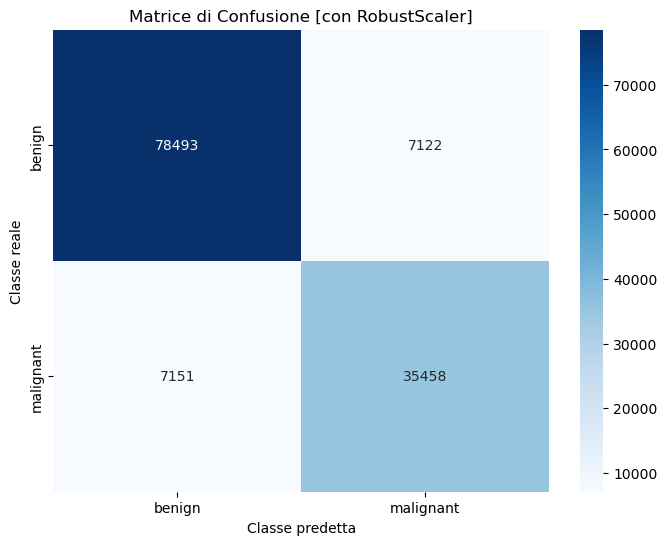

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

y_pred = classifier_logisticregression.predict(x_test_scaled_robust)
y_pred_proba = classifier_logisticregression.predict_proba(x_test_scaled_robust)

report = classification_report(y_test, y_pred, target_names=['benign', 'malignant'])
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione [con RobustScaler]')
plt.show()

### Con Standard Scaler (Z-Normalization) caso con outliers

In [28]:
from sklearn.linear_model import LogisticRegression

classifier_logisticregression = LogisticRegression()
classifier_logisticregression.fit(x_train_scaled_standard, y_train)

LogisticRegression()

              precision    recall  f1-score   support

      benign       0.92      0.91      0.92     85615
   malignant       0.83      0.84      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224

AUC Score: 0.9448


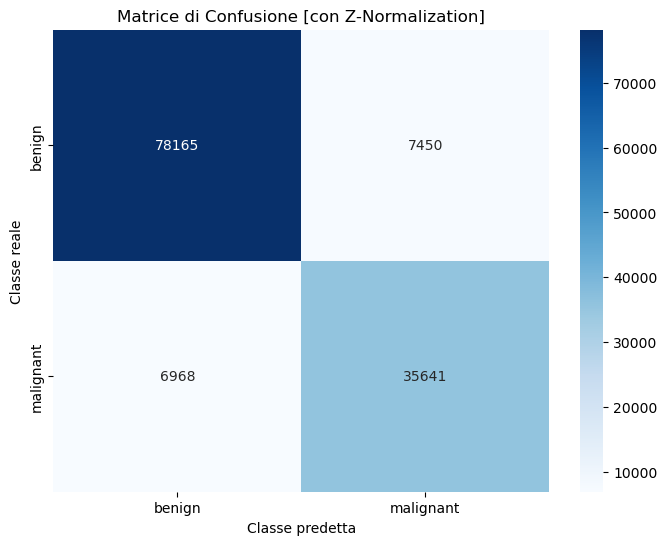

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

y_pred = classifier_logisticregression.predict(x_test_scaled_standard)
y_pred_proba = classifier_logisticregression.predict_proba(x_test_scaled_standard)

report = classification_report(y_test, y_pred, target_names=['benign', 'malignant'])
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione [con Z-Normalization]')
plt.show()

Caso senza outliers

In [30]:
from sklearn.linear_model import LogisticRegression

classifier_logisticregression = LogisticRegression()
classifier_logisticregression.fit(x_train_clean_scaled_standard, y_train_clean)

LogisticRegression()

              precision    recall  f1-score   support

      benign       0.92      0.92      0.92     85615
   malignant       0.83      0.83      0.83     42609

    accuracy                           0.89    128224
   macro avg       0.87      0.87      0.87    128224
weighted avg       0.89      0.89      0.89    128224

AUC Score: 0.9446


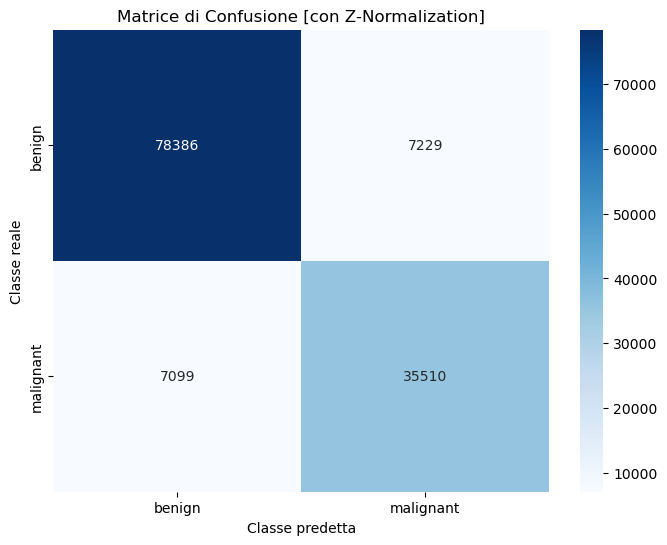

In [31]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

y_pred = classifier_logisticregression.predict(x_test_scaled_standard)
y_pred_proba = classifier_logisticregression.predict_proba(x_test_scaled_standard)

report = classification_report(y_test, y_pred, target_names=['benign', 'malignant'])
print(report)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC Score: {auc_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Classe predetta')
plt.ylabel('Classe reale')
plt.title('Matrice di Confusione [con Z-Normalization]')
plt.show()

Possiamo osservare che il caso migliore è un random forest applicato ai dati con tutti gli outliers. Per quanto riguarda la logistic regression, il caso migliore osservato è quello con tutti gli outliers e un robust scaler, cioè lo scaler che penalizza di meno l'effetto degli outliers. Questi risultati suggeriscono quanto atteso: per quanto forte sia il contributo degli outliers e la loro deviazione significativa dalla media di alcune features, essi pur sempre sono dati che rappresentano esempi significativi per il modello, e non semplici errori di misurazione.

In [20]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination='auto',  # o un valore specifico es. 0.1 per 10% outliers
    random_state=42
)
iso_forest.fit(x_train)
predictions = iso_forest.predict(x_test)

outliers = x_test[predictions == -1]
inliers = x_test[predictions == 1]

print(f"Numero totale di campioni: {len(predictions)}")
print(f"Numero di outliers: {len(outliers)}")
print(f"Numero di inliers: {len(inliers)}")
print(f"Percentuale outliers: {(len(outliers)/len(predictions))*100:.2f}%")

# Compare outlier distribution by type
outlier_types = y_test[predictions == -1].value_counts()
inlier_types = y_test[predictions == 1].value_counts()

print("Distribution of URL types in outliers:")
print(outlier_types)
print("\nPercentage of each type that are outliers:")
for type_name in y_test.unique():
    type_total = len(y_test[y_test == type_name])
    type_outliers = outlier_types.get(type_name, 0)
    print(f"{type_name}: {(type_outliers/type_total)*100:.2f}%")








Numero totale di campioni: 128224
Numero di outliers: 11634
Numero di inliers: 116590
Percentuale outliers: 9.07%
Distribution of URL types in outliers:
type
benign        5421
defacement    2358
phishing      2302
malware       1553
Name: count, dtype: int64

Percentage of each type that are outliers:
defacement: 12.37%
benign: 6.33%
phishing: 12.23%
malware: 32.84%


L'analisi condotta tramite l'algoritmo Isolation Forest evidenzia che, sebbene gli outliers rappresentino una frazione minoritaria del dataset (9.07%), essi includono una percentuale sproporzionatamente elevata di URL malevoli, con particolare rilevanza per le categorie malware (32.84%) e defacement (12.37%). Questo risultato sottolinea come gli outliers non siano semplicemente anomalie casuali o rumore, ma piuttosto un sottoinsieme del dataset altamente rappresentativo di eventi malevoli. Ignorare tali osservazioni potrebbe essere la ragione che comporta una perdita di informazioni critiche per il modello. Infatti, aver includeso gli outliers ha migliorato le capacità del modello nel rilevare e classificare con precisione gli attacchi, in particolare quelle più rare o emergenti, confermando così la validità della tesi